In [1]:
import pandas as pd
import numpy as np
import re


In [2]:
df = pd.read_csv("evaluationFakenews.csv", encoding= 'latin-1')

df.head()

,title,text,label
0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,Oregon Cop Convicted Of Shattering Bikers Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0


In [3]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(8117, 3)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

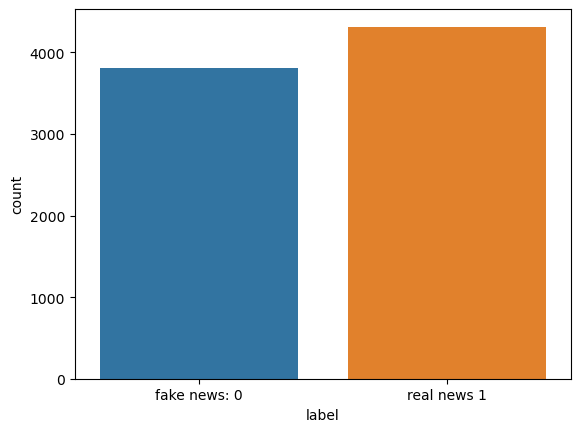

In [7]:
ax = sns.countplot(x=df['label'])

# Change tick labels
ax.set_xticklabels(['fake news: 0', 'real news 1'])

plt.show()

In [8]:
df['label'].value_counts()

1    4314
0    3803
Name: label, dtype: int64

# Preprocessing

**Combine columns**

In [11]:
df['article'] = df['title']+ ' '+ df['text']
df.head()

,title,text,label,article
0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1,"Sanders back in U.S. Senate, blasts 'coloniali..."
1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1,Kremlin: Syria peoples' congress being 'active...
2,Oregon Cop Convicted Of Shattering Bikers Co...,"In a baffling fit of rage, an Oregon State Pol...",0,Oregon Cop Convicted Of Shattering Bikers Co...
3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0,Twitter Erupts With Glee Over #CruzSexScandal...
4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0,MUST WATCH VIDEO: Obama Tries To Trash Trump B...


**Cleaning text**

In [13]:
def clean_text(text:str) -> str:
    text = re.sub(r'\b([A-Z])\.(?=[A-Z])' , r'\1_', text) #preserve abbreviation
    text = re.sub(r'[^\w\s]', '', text.lower())
    text = text.replace('_' ,'.')
    return text



In [14]:
texts = list(df.iloc[:,3])

for i, text in enumerate(texts):
    c_text = clean_text(text)
    df.iloc[i,3] = str(c_text)

In [15]:
df.head()

,title,text,label,article
0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1,sanders back in u.s senate blasts colonialism ...
1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1,kremlin syria peoples congress being actively ...
2,Oregon Cop Convicted Of Shattering Bikers Co...,"In a baffling fit of rage, an Oregon State Pol...",0,oregon cop convicted of shattering bikers col...
3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0,twitter erupts with glee over cruzsexscandal ...
4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0,must watch video obama tries to trash trump bu...


**Tokenization and Nomalization**

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
text = df.iloc[4,3]
text 

'must watch video obama tries to trash trump but turns into a babbling mess video this is too good to miss mr teleprompter didn t do so well when he went off script during an appearance in indiana '

In [20]:
def tokenize_stop_lemma(text:str) -> str:
    tokens = word_tokenize(text)
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words('english') 
    filtered_tokens = []
    
    for word in tokens:
        word = lemmer.lemmatize(word)
        if word not in stop_words:
            filtered_tokens.append(word)
            
    text = ' '.join(filtered_tokens)
    return text

In [21]:
texts = list(df['article'])

for i, text in enumerate(texts):
    filtered_text = tokenize_stop_lemma(text)

    df.iloc[i,3] = filtered_text

In [22]:
df.head()

,title,text,label,article
0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1,sander back u.s senate blast colonialism puert...
1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1,kremlin syria people congress actively discuss...
2,Oregon Cop Convicted Of Shattering Bikers Co...,"In a baffling fit of rage, an Oregon State Pol...",0,oregon cop convicted shattering bikers collarb...
3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0,twitter erupts glee cruzsexscandal rumor tweet...
4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0,must watch video obama try trash trump turn ba...


In [23]:
df.iloc[1,3]

'kremlin syria people congress actively discussed moscow reuters proposal convene congress syria ethnic group joint initiative promoted russia others actively discussed kremlin said friday premature however discus time venue congress seen mechanism assist syria postwar development putin spokesman dmitry peskov told conference call reporter putin mentioned idea holding congress forum foreign scholar thursday'

**Feature Extraction**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tf_vectorizer = TfidfVectorizer(ngram_range = (1,2), max_features = 5000)
X = tf_vectorizer.fit_transform(df['article'])

In [27]:
Vocab = tf_vectorizer.get_feature_names_out()
Vocab.shape

(5000,)

In [28]:
Vocab[0:20]

array(['10', '10 percent', '10 year', '100', '1000', '10000', '100000',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '1990s',
       '20', '20 percent', '20 year'], dtype=object)

In [29]:
y = df['label']

**Train and Test with Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = np.array([]) 
y_pred_all = np.array([]) 
accuracy_lr = []

for train_index , test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_lr = LogisticRegression()
    model_lr.fit(X_train, y_train)

    y_pred = model_lr.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    preci = precision_score(y_test, y_pred, average = 'binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    y_true_all = np.concatenate([y_true_all, y_test])
    y_pred_all = np.concatenate([y_pred_all, y_pred])
    accuracy_lr.append(acc)
    
    print(f"Accuracy: {acc:.4f}\tPrecision: {preci:.4f}\tRecall: {recall:.4f}\tF1 Score: {f1:.4f}\n")


Accuracy: 0.9674	Precision: 0.9666	Recall: 0.9722	F1 Score: 0.9694

Accuracy: 0.9520	Precision: 0.9623	Recall: 0.9467	F1 Score: 0.9544

Accuracy: 0.9569	Precision: 0.9542	Recall: 0.9652	F1 Score: 0.9597

Accuracy: 0.9532	Precision: 0.9539	Recall: 0.9583	F1 Score: 0.9561

Accuracy: 0.9649	Precision: 0.9653	Recall: 0.9687	F1 Score: 0.9670



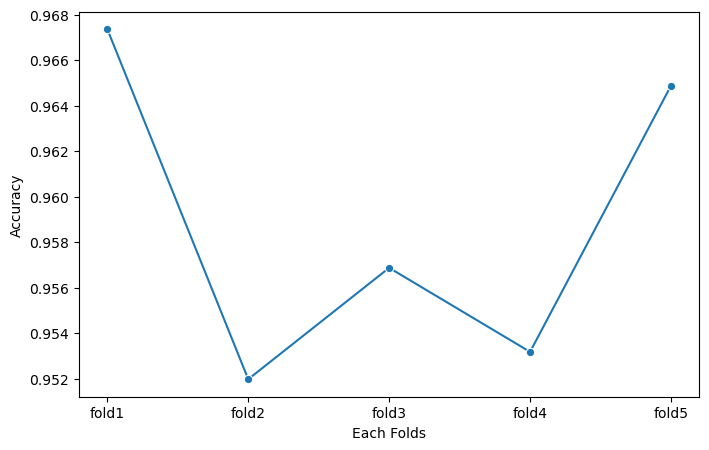

In [33]:
plt.figure(figsize = (8,5))
sns.lineplot(x = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5'], y = accuracy_lr, marker = 'o', linestyle = '-')
plt.xlabel('Each Folds')
plt.ylabel('Accuracy')
plt.show()

In [34]:
cm_lr = confusion_matrix(y_true_all, y_pred_all)

print("Confusion Matrix:\n", cm_lr)
print("\nClassification Report:\n", classification_report(y_true_all, y_pred_all))

Confusion Matrix:
 [[3632  171]
 [ 163 4151]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      3803
         1.0       0.96      0.96      0.96      4314

    accuracy                           0.96      8117
   macro avg       0.96      0.96      0.96      8117
weighted avg       0.96      0.96      0.96      8117



<Axes: >

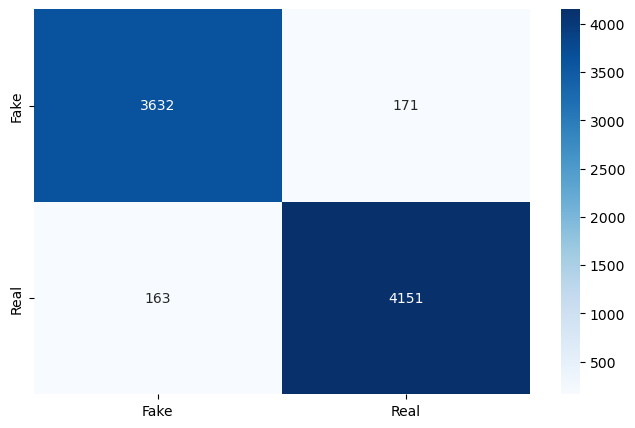

In [35]:
label = np.unique(y_true_all) #[0,1]
label_name = ['Fake', 'Real']

plt.figure(figsize = (8,5))
sns.heatmap(cm_lr, annot = True, cmap = 'Blues', fmt = 'g', xticklabels = label_name, yticklabels = label_name)

**Train and Test with Navie Bayes**

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = np.array([]) 
y_pred_all = np.array([]) 

accuracy_nb = []

for train_index , test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_nb = MultinomialNB()
    model_nb.fit(X_train, y_train)

    y_pred = model_nb.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    preci = precision_score(y_test, y_pred, average = 'binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    y_true_all = np.concatenate([y_true_all, y_test])
    y_pred_all = np.concatenate([y_pred_all, y_pred])
    accuracy_nb.append(acc)
        
    print(f"Accuracy: {acc:.4f}\tPrecision: {preci:.4f}\tRecall: {recall:.4f}\tF1 Score: {f1:.4f}\n")

Accuracy: 0.9298	Precision: 0.9380	Recall: 0.9293	F1 Score: 0.9336

Accuracy: 0.9200	Precision: 0.9379	Recall: 0.9096	F1 Score: 0.9235

Accuracy: 0.9236	Precision: 0.9394	Recall: 0.9154	F1 Score: 0.9272

Accuracy: 0.9168	Precision: 0.9303	Recall: 0.9119	F1 Score: 0.9210

Accuracy: 0.9328	Precision: 0.9424	Recall: 0.9304	F1 Score: 0.9364



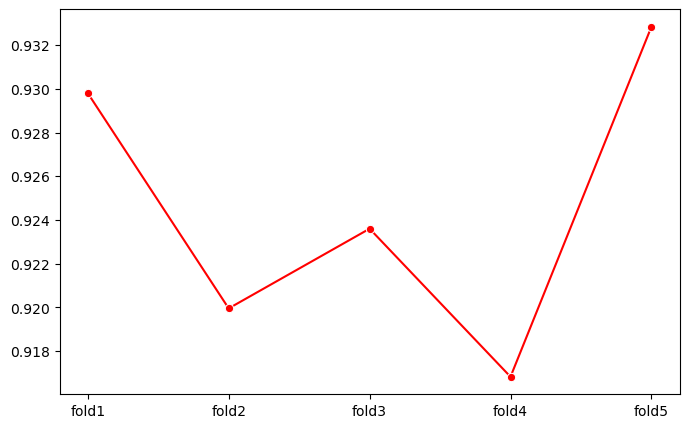

In [39]:
plt.figure(figsize = (8,5))

sns.lineplot(x = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5'], y = accuracy_nb, marker = 'o', linestyle = '-', color = 'red')
plt.show()

In [40]:
cm_nb = confusion_matrix(y_true_all, y_pred_all)

print("Confusion Matrix:\n", cm_nb)
print("\nClassification Report:\n", classification_report(y_true_all, y_pred_all))

Confusion Matrix:
 [[3539  264]
 [ 348 3966]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      3803
         1.0       0.94      0.92      0.93      4314

    accuracy                           0.92      8117
   macro avg       0.92      0.92      0.92      8117
weighted avg       0.92      0.92      0.92      8117



<Axes: >

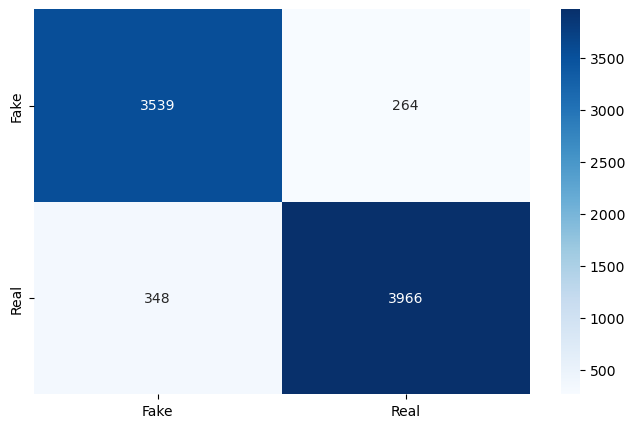

In [41]:
plt.figure(figsize = (8,5))
sns.heatmap(cm_nb, annot = True, cmap = 'Blues', fmt = 'g', xticklabels = label_name, yticklabels = label_name)

**Save model and vectorizer**

define function to save trained model and vectorizer

In [44]:
import pickle

In [45]:
def save_model(model, model_filename:str):
    try:
        with open(model_filename, 'wb') as file:
            pickle.dump(model,file)
        print("Save model success")
    except Exception as e:
            print(f"Error : {e}")
        
def save_vectorizer(vectorizer, vectoriz_filename:str):
    try:
        with open(vectoriz_filename, 'wb') as file:
            pickle.dump(vectorizer, file)
        print("Save vectorizer success")
    except Exception as e:
        print(f"Error : {e}")

In [46]:
save_model(model_lr, "trained_lr_model.pkl")
save_model(model_nb, "trained_nb_model.pkl")
save_vectorizer(tf_vectorizer, "trained_vectorizer_tfidf.pkl")

Save model success
Save model success
Save vectorizer success


define function to load saved model

In [48]:
def load_model(filename:str):
    try:
        with open(filename, 'rb') as file:
            model = pickle.load(file)
            return model
            print("Load model success")
    except FileNotFoundError:
        print(f"Not found {filename}")
    except Exception as e:
        print(f'Error : {e}')

**Testing model prediction with new data**

In [50]:
def predict(input:str , model, vectorizer):
    input = clean_text(input)
    input = tokenize_stop_lemma(input)
    
    new_X = vectorizer.transform([input])

    prediction = model.predict(new_X)

    if prediction == 0:
        result = 'fake news'
    elif prediction == 1:
        result = 'real news'
        
    return result 

In [70]:
trained_lr_model = load_model("trained_lr_model.pkl")
trained_vectorizer = load_model("trained_vectorizer_tfidf.pkl")
trained_nb_model = load_model("trained_nb_model.pkl")
fake = "ATTENTION : Tomorrow morning when you connect to Facebook you'll be invited to payment info.......it's official.....it was even on the news. Facebook will begin to charge fees....because of profile."

real = "Democrats have been powerless as they’ve watched President Donald Trump systematically move to dismantle federal agencies and push the bounds of his office with little concern about the fallout."

result_lr1 = predict(real, trained_lr_model, trained_vectorizer)
result_lr2 = predict(fake, trained_lr_model, trained_vectorizer)

result_nb1 = predict(real, trained_nb_model, trained_vectorizer)
result_nb2 = predict(fake, trained_nb_model, trained_vectorizer)

print(f"Fake news =>\n{fake}\n")
print(f"Real news =>\n{real}\n")
print(f"Logistic Regression Model Prediction\nreal news input prediction0 : {result_lr1}\nfake news input prediction : {result_lr2}\n")
print(f"Navie Bayes Model Prediction\nreal news input prediction : {result_nb1}\nfake news input prediction : {result_nb2}")


Fake news =>
ATTENTION : Tomorrow morning when you connect to Facebook you'll be invited to payment info.......it's official.....it was even on the news. Facebook will begin to charge fees....because of profile.

Real news =>
Democrats have been powerless as they’ve watched President Donald Trump systematically move to dismantle federal agencies and push the bounds of his office with little concern about the fallout.

Logistic Regression Model Prediction
real news input prediction0 : real news
fake news input prediction : fake news

Navie Bayes Model Prediction
real news input prediction : real news
fake news input prediction : fake news
